# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [26]:
import pandas as pd
import numpy as np

In [27]:
Keep_Columns = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]

In [28]:
address = r"D:/AA/Programming/Data Science/Maven-Analytics/Python/Data Analysis With Python AND Pandas/Pandas+Course+Resources/Pandas Course Resources/"
######################################################################
transactions = pd.read_csv(filepath_or_buffer = address + "project_data/project_transactions.csv" ,
                         #parse_dates= ['date'],
                          usecols = Keep_Columns,                  
                         infer_datetime_format = True,
                         dtype = {'QUANTITY': 'int16', 
                                  'PRODUCT_ID' : 'int32',
                                  'household_key' : 'int16',
                                  'BASKET_ID' : 'float64',
                                  'DAY' : 'int16',
                                  'SALES_VALUE' : 'float32'
                                 }
                         )
transactions.round()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_35324\1763236531.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  transactions = pd.read_csv(filepath_or_buffer = address + "project_data/project_transactions.csv" ,


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,2.698490e+10,1,842930,1,2.0
1,1364,2.698490e+10,1,897044,1,3.0
2,1364,2.698490e+10,1,920955,1,3.0
3,1364,2.698490e+10,1,937406,1,2.0
4,1364,2.698490e+10,1,981760,1,1.0
...,...,...,...,...,...,...
2146306,1598,4.230536e+10,711,92130,1,1.0
2146307,1598,4.230536e+10,711,114102,1,9.0
2146308,1598,4.230536e+10,711,133449,1,7.0
2146309,1598,4.230536e+10,711,6923644,1,4.0


In [29]:
transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int16  
 1   BASKET_ID      float64
 2   DAY            int16  
 3   PRODUCT_ID     int32  
 4   QUANTITY       int16  
 5   SALES_VALUE    float32
dtypes: float32(1), float64(1), int16(3), int32(1)
memory usage: 45.0 MB


In [37]:
transactions["DAY"].sub(1).astype(str) + " days"

0            0 days
1            0 days
2            0 days
3            0 days
4            0 days
             ...   
2146306    710 days
2146307    710 days
2146308    710 days
2146309    710 days
2146310    710 days
Name: DAY, Length: 2146311, dtype: object

In [38]:
# Use the following snippet to create a Date Column.

transactions = (transactions.
                assign(DATE = pd.to_datetime(arg = '2016',
                                             format = '%Y',
                                             infer_datetime_format= True,
                                             errors = 'coerce')
                       + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days")
                      ).drop(["DAY"] , axis = 1)
               )   
#     .assign(date = (pd.to_datetime("2016", format='%Y') 
#                     + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
#            )
#     .drop(["DAY"], axis=1)
# )
transactions

C:\Users\ahmad\AppData\Local\Temp\ipykernel_35324\3871065088.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  assign(DATE = pd.to_datetime(arg = '2016',


,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
0,1364,2.698490e+10,842930,1,2.19,2016-01-01
1,1364,2.698490e+10,897044,1,2.99,2016-01-01
2,1364,2.698490e+10,920955,1,3.09,2016-01-01
3,1364,2.698490e+10,937406,1,2.50,2016-01-01
4,1364,2.698490e+10,981760,1,0.60,2016-01-01
...,...,...,...,...,...,...
2146306,1598,4.230536e+10,92130,1,0.99,2017-12-11
2146307,1598,4.230536e+10,114102,1,8.89,2017-12-11
2146308,1598,4.230536e+10,133449,1,6.99,2017-12-11
2146309,1598,4.230536e+10,6923644,1,4.50,2017-12-11


In [39]:
transactions.index = transactions.DATE
transactions.reset_index(drop = True)

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
0,1364,2.698490e+10,842930,1,2.19,2016-01-01
1,1364,2.698490e+10,897044,1,2.99,2016-01-01
2,1364,2.698490e+10,920955,1,3.09,2016-01-01
3,1364,2.698490e+10,937406,1,2.50,2016-01-01
4,1364,2.698490e+10,981760,1,0.60,2016-01-01
...,...,...,...,...,...,...
2146306,1598,4.230536e+10,92130,1,0.99,2017-12-11
2146307,1598,4.230536e+10,114102,1,8.89,2017-12-11
2146308,1598,4.230536e+10,133449,1,6.99,2017-12-11
2146309,1598,4.230536e+10,6923644,1,4.50,2017-12-11


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [40]:
import seaborn as sns
import datetime as dt
transactions.DATE.dt.month

DATE
2016-01-01     1
2016-01-01     1
2016-01-01     1
2016-01-01     1
2016-01-01     1
              ..
2017-12-11    12
2017-12-11    12
2017-12-11    12
2017-12-11    12
2017-12-11    12
Name: DATE, Length: 2146311, dtype: int32

In [41]:
Sum_of_Sales_Month = transactions.
groupby([transactions.DATE.dt.strftime("%Y-%m")]).agg({"SALES_VALUE":'sum'})
Sum_of_Sales_Month

,SALES_VALUE
DATE,
2016-01,46557.968750
2016-02,97315.156250
2016-03,185521.812500
2016-04,267801.375000
2016-05,298319.125000
2016-06,288952.437500
2016-07,296488.031250
2016-08,303951.343750
2016-09,302040.562500


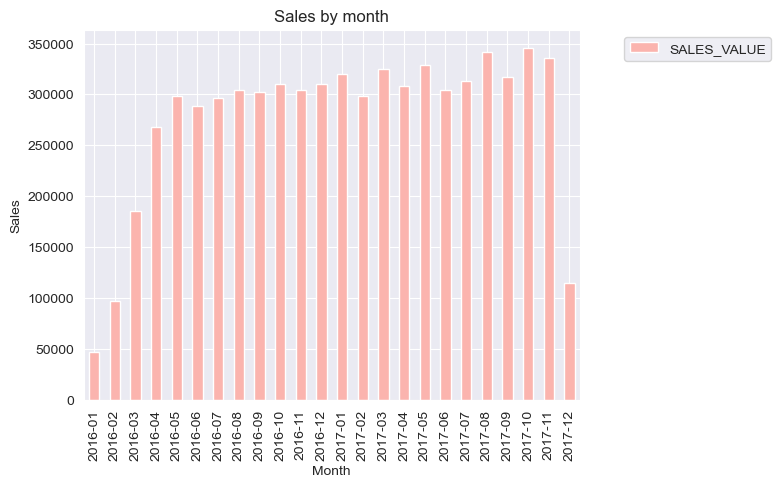

In [42]:
sns.set_style('darkgrid')
Sum_of_Sales_Month.plot(kind = 'bar' ,
                        title = 'Sales by month', 
                        xlabel = 'Month',
                        ylabel = 'Sales',
                        cmap = 'Pastel1'
                 ).legend(bbox_to_anchor = (1.4,1));

In [43]:
import datetime as dt

In [44]:
transactions = transactions.reset_index(drop = True)
transactions.assign(WEEKDAY = transactions['DATE'].dt.dayofweek)

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE,WEEKDAY
0,1364,2.698490e+10,842930,1,2.19,2016-01-01,4
1,1364,2.698490e+10,897044,1,2.99,2016-01-01,4
2,1364,2.698490e+10,920955,1,3.09,2016-01-01,4
3,1364,2.698490e+10,937406,1,2.50,2016-01-01,4
4,1364,2.698490e+10,981760,1,0.60,2016-01-01,4
...,...,...,...,...,...,...,...
2146306,1598,4.230536e+10,92130,1,0.99,2017-12-11,0
2146307,1598,4.230536e+10,114102,1,8.89,2017-12-11,0
2146308,1598,4.230536e+10,133449,1,6.99,2017-12-11,0
2146309,1598,4.230536e+10,6923644,1,4.50,2017-12-11,0


In [51]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE',
       'DATE'],
      dtype='object')

In [66]:
transactions_WEEKDAY = (transactions.
                        groupby(transactions.DATE.dt.strftime('%A')).
                        agg({"SALES_VALUE" : "sum"}).sort_values(by = ['SALES_VALUE'],ascending = True))
transactions_WEEKDAY

,SALES_VALUE
DATE,
Friday,8.329580e+05
Saturday,8.339447e+05
Thursday,8.398841e+05
Wednesday,9.209571e+05
Sunday,9.295794e+05
Monday,1.136462e+06
Tuesday,1.172458e+06


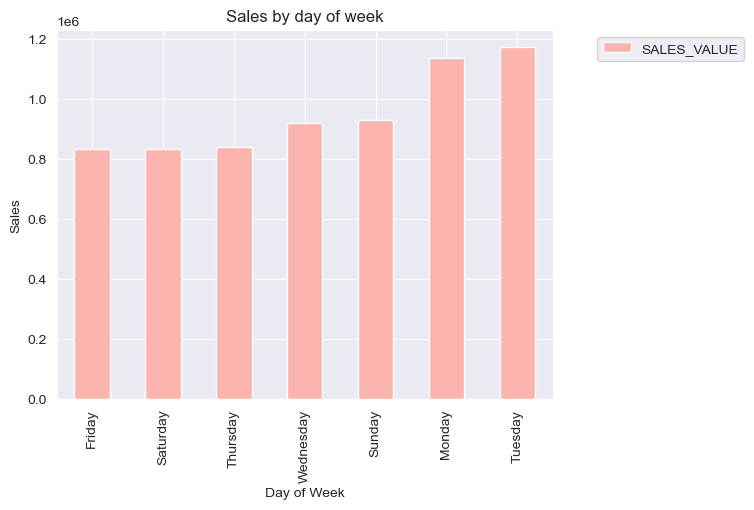

In [67]:
transactions_WEEKDAY.plot(kind = 'bar', 
                         title = 'Sales by day of week',
                         xlabel = 'Day of Week',
                         ylabel = 'Sales',
                         cmap = 'Pastel1' 
                         ).legend(bbox_to_anchor = (1.4,1));

In [ ]:
#transactions["DATE2"] = transactions.DATE.dt.strftime("%Y-%B-%d")
transactions.index = transactions.DATE
transaction_Apr_Oct = transactions.loc["2016-04-01" : "2017-10-31" , :]
Grp_Trs = transaction_Apr_Oct.groupby(by = [transaction_Apr_Oct.DATE.dt.strftime("%Y-%m")]).agg({'SALES_VALUE': 'sum'})
Grp_Trs

In [ ]:
np.sort(transaction_Apr_Oct.DATE.dt.month.unique())

In [ ]:
Grp_Trs.plot(kind = 'bar' , 
            xlabel = 'month',
            ylabel = 'Sales',
            cmap = 'Pastel2'
            ).legend(bbox_to_anchor = [1.4 , 1]);

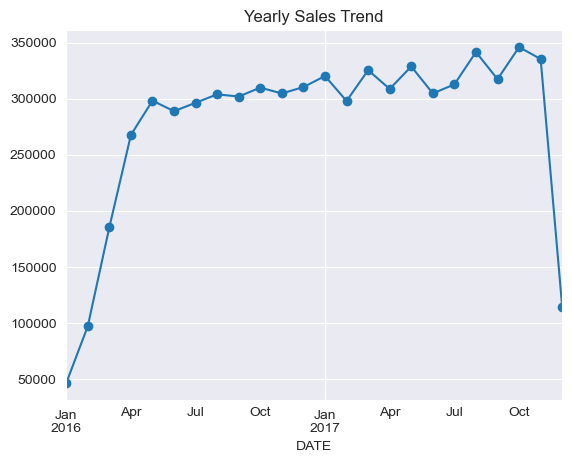

In [104]:
transactions_Year = transactions.set_index("DATE")

# Group by Year and Sum Sales
yearly_sales = transactions_Year.resample("M")["SALES_VALUE"].sum()

# Plot
yearly_sales.plot(kind="line", marker="o", title="Yearly Sales Trend");


# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [100]:
hh_demographic = pd.read_csv(address + "project_data/hh_demographic.csv" , 
                             usecols= ['AGE_DESC','INCOME_DESC','household_key','HH_COMP_DESC'],
                             infer_datetime_format = True,
                             dtype= {'AGE_DESC': 'category' , 
                                     'INCOME_DESC' : 'category',
                                     'HH_COMP_DESC' : 'category',
                                     'household_key' : 'int16'
                                    }
                            )
hh_demographic.describe(include='all').round()
hh_demographic.info(memory_usage='deep')

C:\Users\ahmad\AppData\Local\Temp\ipykernel_35324\1331519610.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  hh_demographic = pd.read_csv(address + "project_data/hh_demographic.csv" ,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int16   
dtypes: category(3), int16(1)
memory usage: 6.2 KB


In [101]:
hh_demographic

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16
...,...,...,...,...
796,35-44,50-74K,2 Adults No Kids,2494
797,45-54,75-99K,Unknown,2496
798,45-54,35-49K,Single Male,2497
799,25-34,50-74K,2 Adults No Kids,2498


In [107]:
for col in hh_demographic.columns:
    print(f"{col} has {hh_demographic[col].nunique()} unique values.")

AGE_DESC has 6 unique values.
INCOME_DESC has 12 unique values.
HH_COMP_DESC has 6 unique values.
household_key has 801 unique values.


In [109]:
hh_demographic.columns

Index(['AGE_DESC', 'INCOME_DESC', 'HH_COMP_DESC', 'household_key'], dtype='object')

In [105]:
household_sales = (transactions
                   .groupby("household_key")
                   .agg({"SALES_VALUE": "sum"})
                  )

household_sales

,SALES_VALUE
household_key,
1,4330.160156
2,1954.339966
3,2653.209961
4,1200.109985
5,779.059998
...,...
2095,3790.489990
2096,1301.650024
2097,8823.830078


In [119]:
hh_demographic.columns.intersection(transactions.columns)

Index(['household_key'], dtype='object')

In [121]:
household_sales_demo = household_sales.merge(hh_demographic, 
                                             how = 'inner' , 
                                             left_on = 'household_key' , 
                                             right_on= 'household_key'
                                            )
household_sales_demo

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.160156,65+,35-49K,2 Adults No Kids
1,7,3400.050049,45-54,50-74K,2 Adults No Kids
2,8,5534.970215,25-34,25-34K,2 Adults Kids
3,13,13190.919922,25-34,75-99K,2 Adults Kids
4,16,1512.020020,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.740234,45-54,100-124K,Unknown
664,2088,4905.709961,25-34,35-49K,Single Female
665,2092,2290.540039,35-44,Under 15K,1 Adult Kids
666,2094,3055.520020,45-54,50-74K,2 Adults No Kids


In [122]:
household_sales_demo.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int16   
 1   SALES_VALUE    668 non-null    float32 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float32(1), int16(1)
memory usage: 8.1 KB


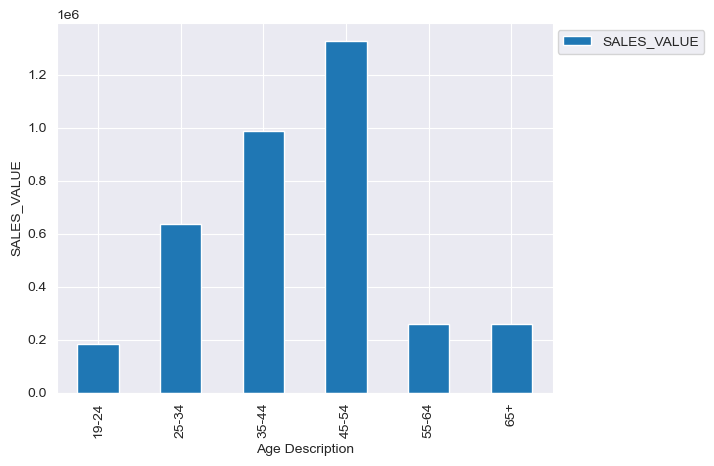

In [151]:
(household_sales_demo.groupby("AGE_DESC").
 agg({"SALES_VALUE": 'sum'}).
 plot(kind = 'bar' , 
      xlabel = 'Age Description' , 
      ylabel = 'SALES_VALUE').
 legend(bbox_to_anchor = (1.32,1))
);

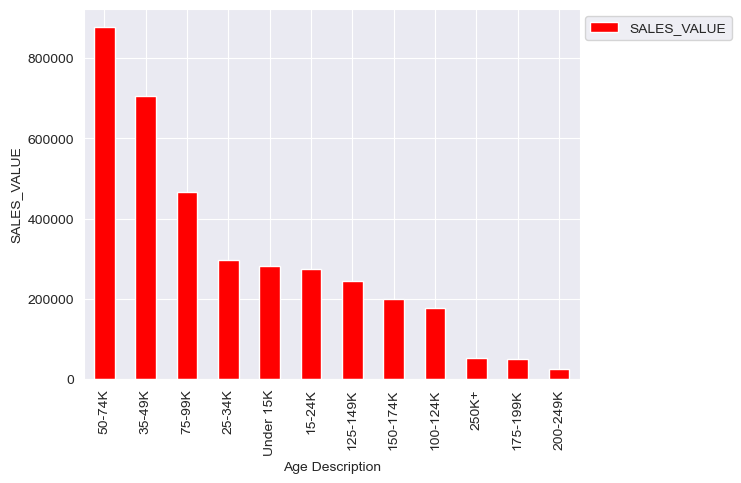

In [149]:
(household_sales_demo.groupby("INCOME_DESC").
 agg({"SALES_VALUE": 'sum'}).
 sort_values("SALES_VALUE" , ascending = False).
 plot(kind = 'bar' , 
      xlabel = 'Age Description' , 
      ylabel = 'SALES_VALUE' , 
      color = 'Red'     
     ).
 legend(bbox_to_anchor = (1.32,1))
);

In [154]:
household_sales_demo.columns

Index(['household_key', 'SALES_VALUE', 'AGE_DESC', 'INCOME_DESC',
       'HH_COMP_DESC'],
      dtype='object')

In [160]:
(
    household_sales_demo.
    pivot_table(index = "AGE_DESC" ,
                columns= "HH_COMP_DESC",
                values = "SALES_VALUE",
                aggfunc= 'mean'
               ).style.background_gradient(cmap = 'RdYlGn' , axis =None)
)

# 55-64 Unknown

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796875,5428.945312,4020.800049,4576.095703,3216.834961,4911.274902
25-34,5512.196777,5753.973633,5638.515625,4807.440918,4909.522461,7356.270508
35-44,6297.737793,6691.772461,6260.412598,6015.192383,4844.191895,4227.691895
45-54,6632.568848,6610.484863,5839.526855,4549.365234,4636.637207,4843.995605
55-64,3064.869873,4695.654785,5752.413574,4816.148438,3922.546143,7973.750000
65+,4040.810059,5536.866699,4614.108398,4059.699463,3871.555908,2879.290039


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [87]:
product = pd.read_csv(filepath_or_buffer = address + "project_data/product.csv" ,
                     infer_datetime_format = True, 
                     dtype = { 'PRODUCT_ID' : 'int32' , 
                               'MANUFACTURER' : 'int16' ,
                               'DEPARTMENT' : 'category',
                               'BRAND' : 'category' ,
                               'COMMODITY_DESC' : 'category' ,
                               'SUB_COMMODITY_DESC' : 'category',
                               'CURR_SIZE_OF_PRODUCT' : 'category'
                     }
                     )
product

C:\Users\ahmad\AppData\Local\Temp\ipykernel_35324\1305890647.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  product = pd.read_csv(filepath_or_buffer = address + "project_data/product.csv" ,


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [88]:
product.describe(include = 'all').loc[['min' , 'max'] , :]


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
min,25671.0,1.0,NaN,NaN,NaN,NaN,NaN
max,18316298.0,6477.0,NaN,NaN,NaN,NaN,NaN


In [89]:
product.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PRODUCT_ID            92353 non-null  int32   
 1   MANUFACTURER          92353 non-null  int16   
 2   DEPARTMENT            92353 non-null  category
 3   BRAND                 92353 non-null  category
 4   COMMODITY_DESC        92353 non-null  category
 5   SUB_COMMODITY_DESC    92353 non-null  category
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  category
dtypes: category(5), int16(1), int32(1)
memory usage: 1.9 MB


In [90]:
for col in product.columns:
    print(col , product[col].nunique() , sep = ' :  ')

PRODUCT_ID :  92353
MANUFACTURER :  6476
DEPARTMENT :  44
BRAND :  2
COMMODITY_DESC :  308
SUB_COMMODITY_DESC :  2383
CURR_SIZE_OF_PRODUCT :  4345


In [86]:
product.isna().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [91]:
for col in product.columns:
    print(f"{col} has {product[col].nunique()} unique elements which are \n {product[col].unique()}.", 
          end = '\n\n')

PRODUCT_ID has 92353 unique elements which are 
 [   25671    26081    26093 ... 18293696 18294080 18316298].

MANUFACTURER has 6476 unique elements which are 
 [   2   69   16 ... 2748 4868 2227].

DEPARTMENT has 44 unique elements which are 
 ['GROCERY', 'MISC. TRANS.', 'PASTRY', 'DRUG GM', 'MEAT-PCKGD', ..., 'HOUSEWARES', 'POSTAL CENTER', 'PHOTO', 'VIDEO', 'PHARMACY SUPPLY']
Length: 44
Categories (44, object): [' ', 'AUTOMOTIVE', 'CHARITABLE CONT', 'CHEF SHOPPE', ..., 'TOYS', 'TRAVEL & LEISUR', 'VIDEO', 'VIDEO RENTAL'].

BRAND has 2 unique elements which are 
 ['National', 'Private']
Categories (2, object): ['National', 'Private'].

COMMODITY_DESC has 308 unique elements which are 
 ['FRZN ICE', 'NO COMMODITY DESCRIPTION', 'BREAD', 'FRUIT - SHELF STABLE', 'COOKIES/CONES', ..., 'MISCELLANEOUS(CORP USE ONLY)', 'SPORTS MEMORABLILIA', 'LONG DISTANCE CALLING CARDS', 'PKG.SEAFOOD MISC', 'FROZEN PACKAGE MEAT']
Length: 308
Categories (308, object): [' ', '(CORP USE ONLY)', 'ADULT INCONTINEN

In [92]:
product.CURR_SIZE_OF_PRODUCT.isna().sum()

0

In [93]:
product.columns

Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [95]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE',
       'DATE'],
      dtype='object')

In [102]:
hh_demographic.columns

Index(['AGE_DESC', 'INCOME_DESC', 'HH_COMP_DESC', 'household_key'], dtype='object')

In [103]:
hh_demographic.columns.intersection(transactions.columns.intersection(product.columns))

Index([], dtype='object')

In [96]:
product.columns.intersection(transactions.columns)

Index(['PRODUCT_ID'], dtype='object')

In [99]:
product.merge(transactions,
              how = 'inner' , 
              left_on = 'PRODUCT_ID', 
              right_on = 'PRODUCT_ID')

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,household_key,BASKET_ID,QUANTITY,SALES_VALUE,DATE
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,1228,2.904662e+10,1,3.49,2016-06-05
1,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,358,3.070761e+10,1,3.49,2016-09-03
2,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,325,3.304671e+10,4,13.96,2017-02-13
3,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,,1675,3.076027e+10,1,0.99,2016-09-06
4,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,,1032,3.378385e+10,1,1.59,2017-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,18292005,764,GROCERY,National,PAPER TOWELS,PAPER TOWELS & HOLDERS,,119,4.226321e+10,2,4.38,2017-12-09
2146307,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,,1947,4.227619e+10,1,7.19,2017-12-10
2146308,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,,2022,4.217280e+10,1,7.19,2017-12-02
2146309,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,,2070,4.226343e+10,1,4.79,2017-12-09


In [ ]:
hh_demographic.groupby(["AGE_DESC" , "HH"])

# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.